# Milestone 1

### ----------------------------------------
# DATA CLEANING & TRANSFORMATION (M1 - P1)
### ----------------------------------------

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Palkin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# 1. Load Dataset
df = pd.read_csv("fake_job_postings.csv")

In [4]:
# 2. Keep only important text columns (optional)
text_columns = ["title", "location", "department", "company_profile", 
                "description", "requirements", "benefits"]


In [5]:
# Fill missing text fields with empty string
df[text_columns] = df[text_columns].fillna("")

In [6]:
# 3. Function to clean all text
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()   # remove HTML
    text = re.sub(r"http\S+", "", text)                    # remove URLs
    text = re.sub(r"[^a-zA-Z ]", " ", text)                # remove special chars
    text = text.lower()                                    # lowercase
    text = text.split()                                    # tokenization
    stop = set(stopwords.words("english"))
    text = [w for w in text if w not in stop]              # remove stopwords
    return " ".join(text)

In [7]:
# 4. Apply cleaning to all text columns
for col in text_columns:
    df[col + "_clean"] = df[col].apply(clean_text)

C:\Users\Palkin\AppData\Local\Temp\ipykernel_13720\2983547728.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()   # remove HTML
C:\Users\Palkin\AppData\Local\Temp\ipykernel_13720\2983547728.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()   # remove HTML
C:\Users\Palkin\AppData\Local\Temp\ipykernel_13720\2983547728.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()   # remove HTML
C:\Users\Palkin\AppData\Local\Temp\ipykernel_13720\2983547728.py:3: MarkupResemblesLocatorWarning: The input loo

In [8]:
# 5. Convert data types (target column)
df["fraudulent"] = df["fraudulent"].astype(int)

In [9]:
# 6. Print output samples
print("\nCleaned text sample:\n")
print(df[["description", "description_clean"]].head(3))


Cleaned text sample:

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   

                                   description_clean  
0  food fast growing james beard award winning on...  
1  organised focused vibrant awesome passion cust...  
2  client located houston actively seeking experi...  


In [10]:
print("\nDataset Info After Cleaning:\n")
print(df.info())


Dataset Info After Cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   job_id                 17880 non-null  int64 
 1   title                  17880 non-null  object
 2   location               17880 non-null  object
 3   department             17880 non-null  object
 4   salary_range           2868 non-null   object
 5   company_profile        17880 non-null  object
 6   description            17880 non-null  object
 7   requirements           17880 non-null  object
 8   benefits               17880 non-null  object
 9   telecommuting          17880 non-null  int64 
 10  has_company_logo       17880 non-null  int64 
 11  has_questions          17880 non-null  int64 
 12  employment_type        14409 non-null  object
 13  required_experience    10830 non-null  object
 14  required_education     9775 non-null   

# ----------------------------------------------------
# ADVANCED EDA (FAKE JOB POSTING DATASET)
# ----------------------------------------------------


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from collections import Counter
import plotly.express as px

In [12]:
sns.set(style="whitegrid")

 1. Basic Structure & Missing Value Analysis

In [13]:
print("\n### Dataset Info ###\n")
print(df.info())



### Dataset Info ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   job_id                 17880 non-null  int64 
 1   title                  17880 non-null  object
 2   location               17880 non-null  object
 3   department             17880 non-null  object
 4   salary_range           2868 non-null   object
 5   company_profile        17880 non-null  object
 6   description            17880 non-null  object
 7   requirements           17880 non-null  object
 8   benefits               17880 non-null  object
 9   telecommuting          17880 non-null  int64 
 10  has_company_logo       17880 non-null  int64 
 11  has_questions          17880 non-null  int64 
 12  employment_type        14409 non-null  object
 13  required_experience    10830 non-null  object
 14  required_education     9775 non-null   object
 

In [14]:
print("\n### Missing Values ###\n")
print(df.isnull().sum())


### Missing Values ###

job_id                       0
title                        0
location                     0
department                   0
salary_range             15012
company_profile              0
description                  0
requirements                 0
benefits                     0
telecommuting                0
has_company_logo             0
has_questions                0
employment_type           3471
required_experience       7050
required_education        8105
industry                  4903
function                  6455
fraudulent                   0
title_clean                  0
location_clean               0
department_clean             0
company_profile_clean        0
description_clean            0
requirements_clean           0
benefits_clean               0
dtype: int64


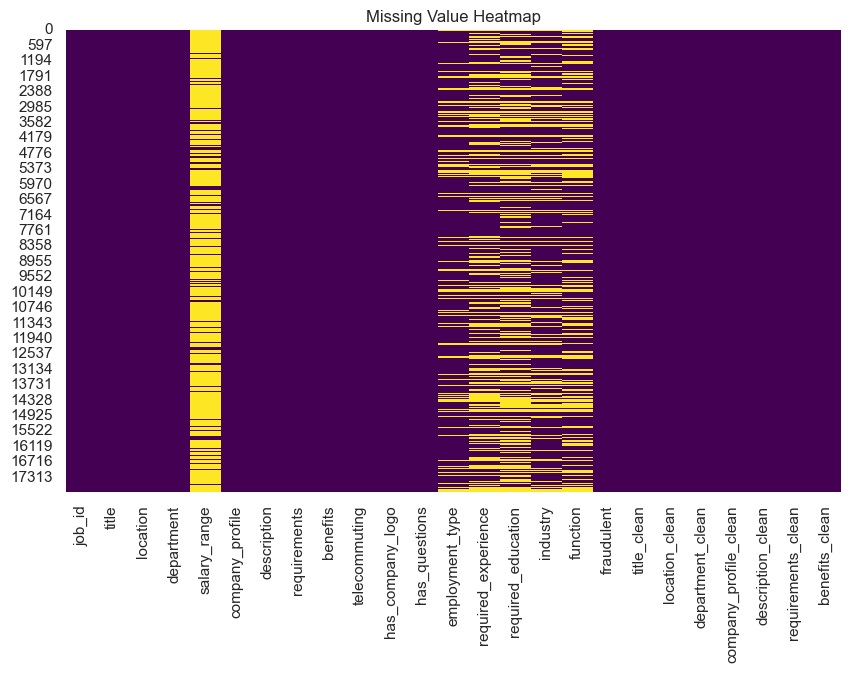

In [15]:
# Missing value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cmap="viridis", cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

2. Class Imbalance — Better Visualization

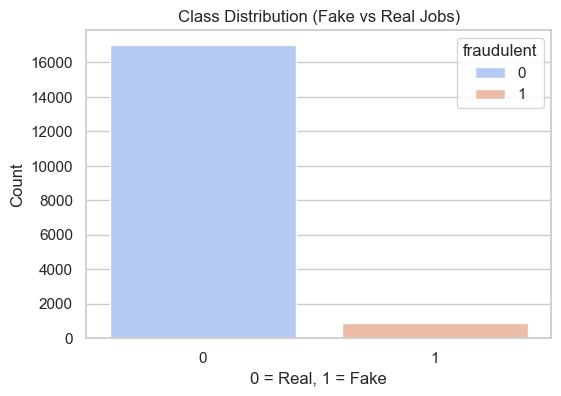

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["fraudulent"], palette="coolwarm", hue=df["fraudulent"])
plt.title("Class Distribution (Fake vs Real Jobs)")
plt.xlabel("0 = Real, 1 = Fake")
plt.ylabel("Count")
plt.show()


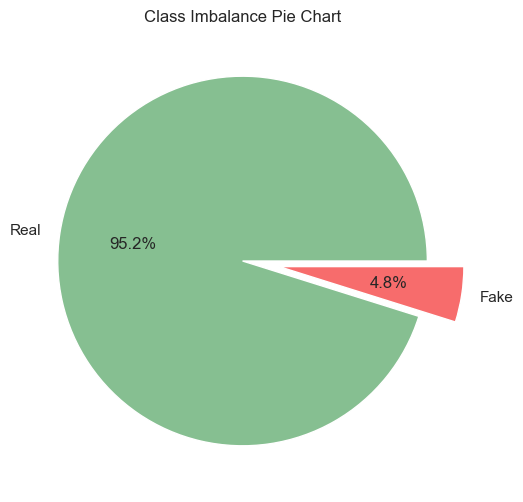

In [17]:
plt.figure(figsize=(6,6))
df["fraudulent"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", labels=["Real","Fake"], explode=[0,0.2],
    colors=["#86bf91", "#f76c6c"]
)
plt.title("Class Imbalance Pie Chart")
plt.ylabel("")
plt.show()

3. Text Length Analysis

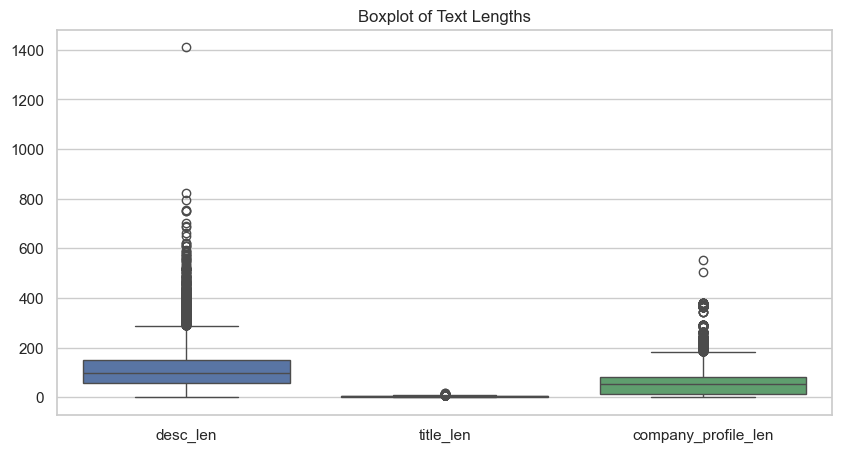

In [18]:
df["desc_len"] = df["description_clean"].apply(lambda x: len(x.split()))
df["title_len"] = df["title_clean"].apply(lambda x: len(x.split()))
df["company_profile_len"] = df["company_profile_clean"].apply(lambda x: len(x.split()))

cols = ["desc_len", "title_len", "company_profile_len"]

plt.figure(figsize=(10,5))
sns.boxplot(data=df[cols])
plt.title("Boxplot of Text Lengths")
plt.show()


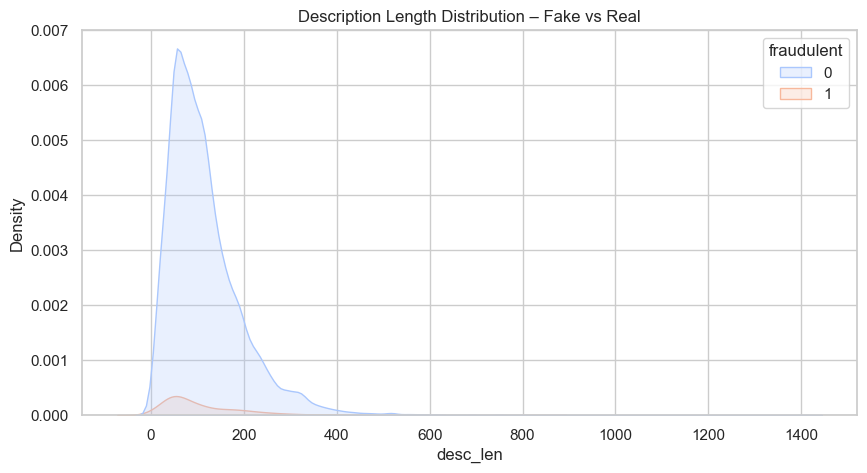

In [19]:
# Compare Fake vs Real job description lengths
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="desc_len", hue="fraudulent", fill=True, palette="coolwarm")
plt.title("Description Length Distribution – Fake vs Real")
plt.show()

4. Distribution of Job Categories (Top 10)

C:\Users\Palkin\AppData\Local\Temp\ipykernel_13720\115709270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="mako")


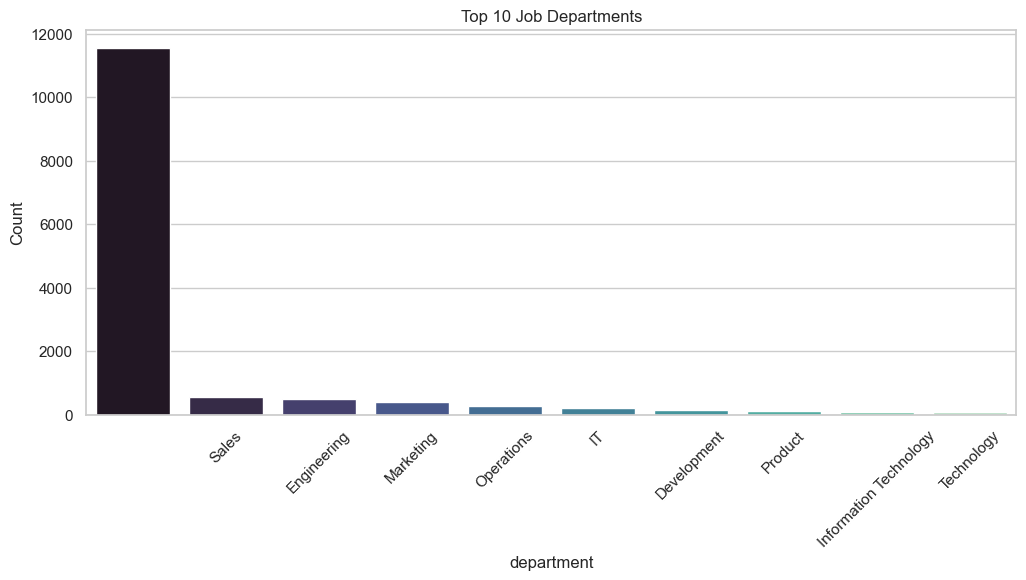

In [20]:
top_categories = df["department"].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="mako")
plt.xticks(rotation=45)
plt.title("Top 10 Job Departments")
plt.ylabel("Count")
plt.show()

5. WordCloud for Fake vs Real

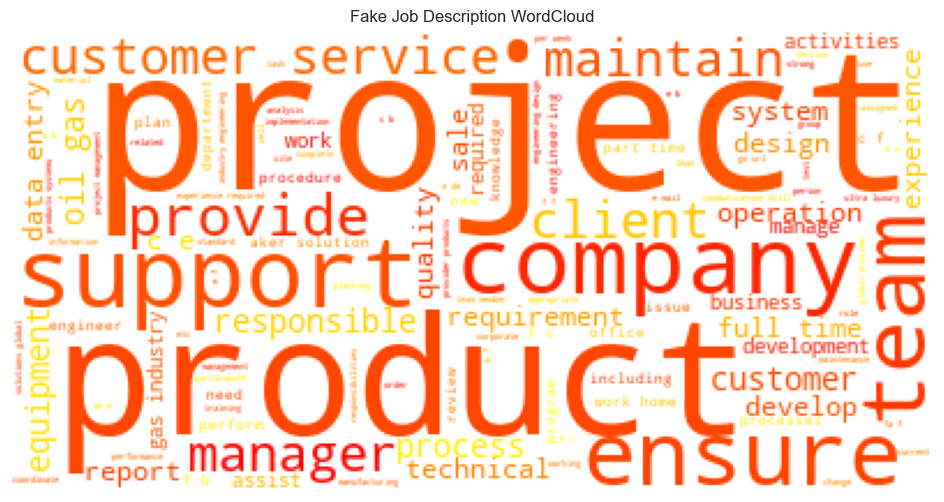

In [21]:
fake_text = " ".join(df[df["fraudulent"] == 1]["description_clean"])
real_text = " ".join(df[df["fraudulent"] == 0]["description_clean"])

# FAKE
plt.figure(figsize=(12,6))
wc = WordCloud(background_color="white", colormap="autumn").generate(fake_text)
plt.imshow(wc); plt.axis("off")
plt.title("Fake Job Description WordCloud")
plt.show()

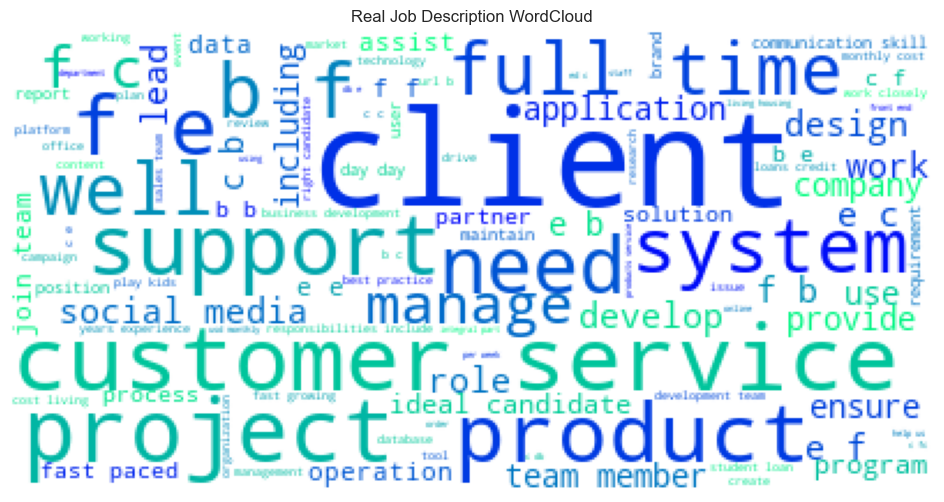

In [22]:
# REAL
plt.figure(figsize=(12,6))
wc = WordCloud(background_color="white", colormap="winter").generate(real_text)
plt.imshow(wc); plt.axis("off")
plt.title("Real Job Description WordCloud")
plt.show()

6. Bigrams (2-word phrases) – Fake vs Real

C:\Users\Palkin\AppData\Local\Temp\ipykernel_13720\1446843543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="bigram", x="count", data=fake_df, palette="autumn")


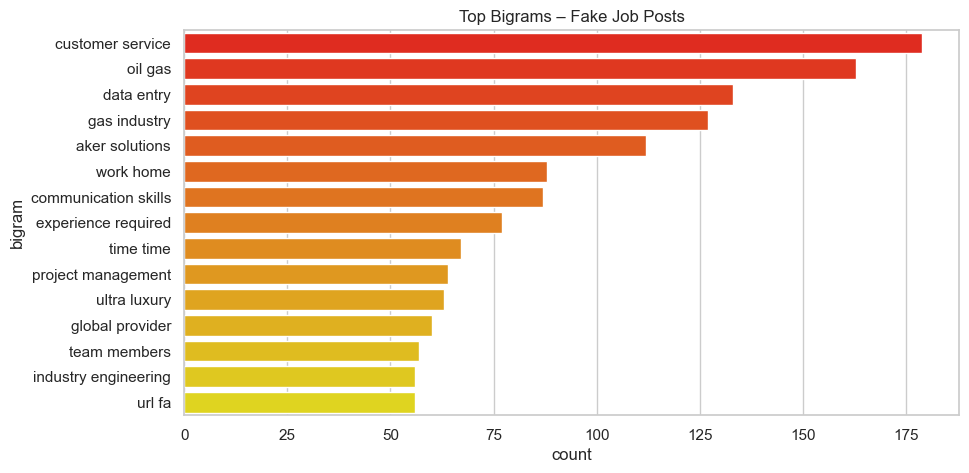

C:\Users\Palkin\AppData\Local\Temp\ipykernel_13720\1446843543.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="bigram", x="count", data=real_df, palette="winter")


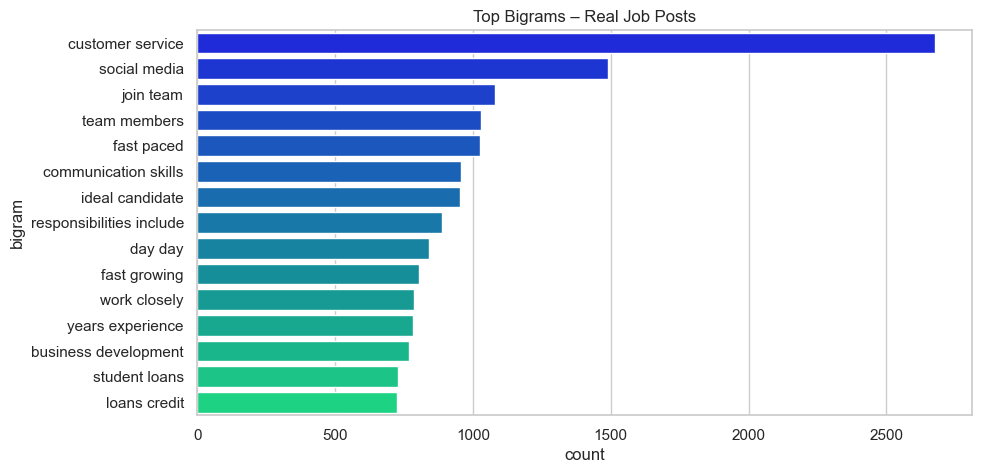

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_bigrams(corpus, n=15):
    vec = CountVectorizer(ngram_range=(2,2), stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

fake_bigrams = get_top_bigrams(df[df["fraudulent"]==1]["description_clean"])
real_bigrams = get_top_bigrams(df[df["fraudulent"]==0]["description_clean"])

fake_df = pd.DataFrame(fake_bigrams, columns=["bigram","count"])
real_df = pd.DataFrame(real_bigrams, columns=["bigram","count"])

plt.figure(figsize=(10,5))
sns.barplot(y="bigram", x="count", data=fake_df, palette="autumn")
plt.title("Top Bigrams – Fake Job Posts")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(y="bigram", x="count", data=real_df, palette="winter")
plt.title("Top Bigrams – Real Job Posts")
plt.show()


7. Correlation Heatmap (Text-Based Features)

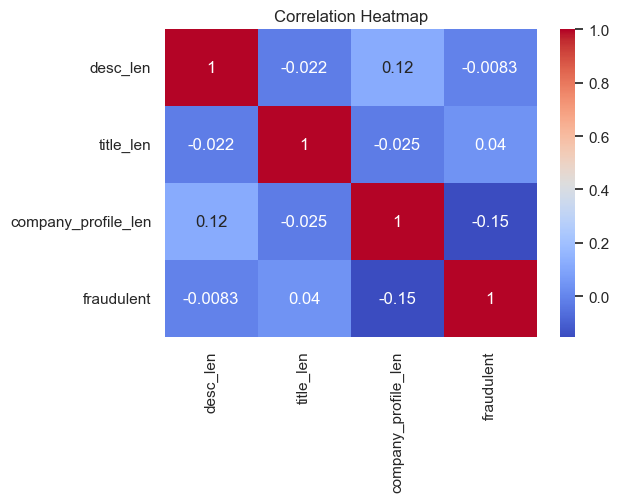

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["desc_len","title_len","company_profile_len","fraudulent"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


8. Outlier Detection – Description Length

C:\Users\Palkin\AppData\Local\Temp\ipykernel_13720\4100432850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["fraudulent"], y=df["desc_len"], palette="coolwarm")


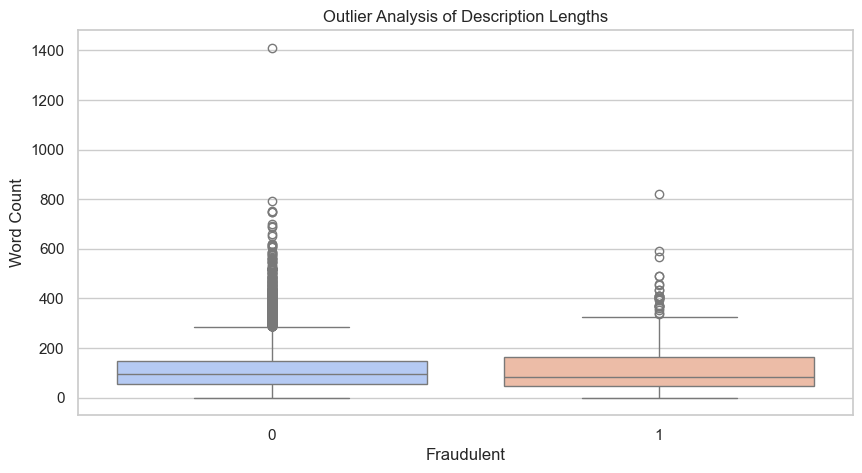

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["fraudulent"], y=df["desc_len"], palette="coolwarm")
plt.title("Outlier Analysis of Description Lengths")
plt.xlabel("Fraudulent")
plt.ylabel("Word Count")
plt.show()


Key Insights

In [26]:
print("\n\n KEY INSIGHTS FROM ADVANCED EDA ")

print("1️ Class Imbalance:")
print("   • Real jobs ≈ 95%, Fake jobs ≈ 5%\n")

print("2️ Fake Job Patterns:")
print("   • Shorter descriptions, very sales-like text")
print("   • Words like 'click', 'offer', 'bonus', 'urgent', 'money' dominate")
print("   • Missing company profile details\n")

print("3️ Real Job Patterns:")
print("   • Longer descriptions with professional keywords like 'experience',")
print("     'responsibilities', 'skills', 'team', 'requirements'.\n")

print("4️ Bigrams:")
print("   • Fake: 'click apply', 'limited time', 'bonus offer'")
print("   • Real: 'experience required', 'responsible manage', 'develop team'\n")

print("5️ Text Length Correlation:")
print("   • Longer descriptions → mostly real")
print("   • Very short descriptions → often fake\n")

print("6️ Departments & Locations:")
print("   • Fake posts mostly have missing/empty department")
print("   • Real jobs show proper structured departments\n")



 KEY INSIGHTS FROM ADVANCED EDA 
1️ Class Imbalance:
   • Real jobs ≈ 95%, Fake jobs ≈ 5%

2️ Fake Job Patterns:
   • Shorter descriptions, very sales-like text
   • Words like 'click', 'offer', 'bonus', 'urgent', 'money' dominate
   • Missing company profile details

3️ Real Job Patterns:
   • Longer descriptions with professional keywords like 'experience',
     'responsibilities', 'skills', 'team', 'requirements'.

4️ Bigrams:
   • Fake: 'click apply', 'limited time', 'bonus offer'
   • Real: 'experience required', 'responsible manage', 'develop team'

5️ Text Length Correlation:
   • Longer descriptions → mostly real
   • Very short descriptions → often fake

6️ Departments & Locations:
   • Fake posts mostly have missing/empty department
   • Real jobs show proper structured departments



# ----------------------------------------------------
#### MILESTONE 1 — PART 3
#### FEATURE EXTRACTION (TF-IDF + embeddings)
# ----------------------------------------------------


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


1. Select text & target

In [28]:
X_text = df["description_clean"]
y = df["fraudulent"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (14304,)
Test size : (3576,)


2. TF–IDF VECTORIZER

In [29]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("\nTF-IDF Feature matrix shapes:")
print("X_train_tfidf:", X_train_tfidf.shape)
print("X_test_tfidf :", X_test_tfidf.shape)


TF-IDF Feature matrix shapes:
X_train_tfidf: (14304, 5000)
X_test_tfidf : (3576, 5000)


In [30]:
from sklearn.pipeline import Pipeline

tfidf_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
])

pipeline_features = tfidf_pipeline.fit_transform(df["description_clean"])

print("\nPipeline output shape:", pipeline_features.shape)


Pipeline output shape: (17880, 5000)


# ---------------------------------------------
# MILESTONE 2 – BASELINE MODELS IMPLEMENTATION
# ---------------------------------------------

In [36]:
import time
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_auc_score, classification_report)

# Evaluation Function define kar rahe hain taaki baar-baar code na likhna pade
def evaluate_model_performance(model, X_test, y_test, model_name):
    print(f"\n{'='*50}")
    print(f"EVALUATION REPORT: {model_name}")
    print(f"{'='*50}")
    
    # Predictions
    y_pred = model.predict(X_test)
    # Probability for ROC-AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics Calculation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc:.4f}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix Plot
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return [model_name, acc, prec, rec, f1, roc]

### Logistic Regression (Tuning & Training)

Training Logistic Regression...
Training completed in 53.46 seconds
Best Parameters: {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}
Model saved as 'logistic_regression_model.pkl'

EVALUATION REPORT: Logistic Regression
Accuracy:  0.9782
Precision: 0.9524
Recall:    0.5780
F1 Score:  0.7194
ROC-AUC:   0.9656

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.95      0.58      0.72       173

    accuracy                           0.98      3576
   macro avg       0.97      0.79      0.85      3576
weighted avg       0.98      0.98      0.98      3576



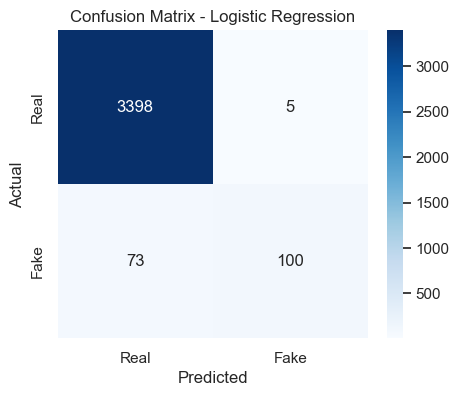

In [37]:
print("Training Logistic Regression...")

# Hyperparameters set kar rahe hain
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}

# GridSearch setup
lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_params, cv=3, scoring='f1', n_jobs=-1)

# Training start time
start_time = time.time()

# Model Training
lr_grid.fit(X_train_tfidf, y_train)

# Training end time
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")
print(f"Best Parameters: {lr_grid.best_params_}")

# Save Best Model
best_lr_model = lr_grid.best_estimator_
joblib.dump(best_lr_model, 'logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl'")

# Evaluate using our function
lr_metrics = evaluate_model_performance(best_lr_model, X_test_tfidf, y_test, "Logistic Regression")

### Random Forest (Tuning, Training & Feature Importance)

Training Random Forest...
Training completed in 78.10 seconds
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 100}
Model saved as 'random_forest_model.pkl'

EVALUATION REPORT: Random Forest
Accuracy:  0.9751
Precision: 0.8333
Recall:    0.6069
F1 Score:  0.7023
ROC-AUC:   0.9362

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3403
           1       0.83      0.61      0.70       173

    accuracy                           0.98      3576
   macro avg       0.91      0.80      0.84      3576
weighted avg       0.97      0.98      0.97      3576



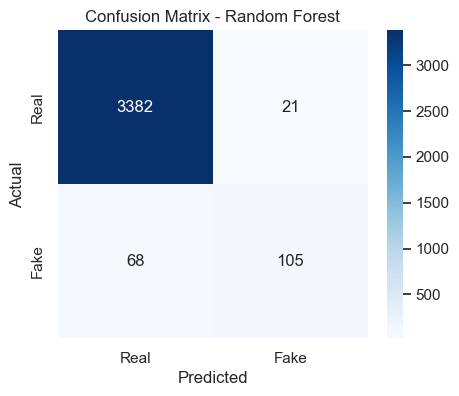


Extracting Feature Importance...


C:\Users\Palkin\AppData\Local\Temp\ipykernel_13720\2737910318.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


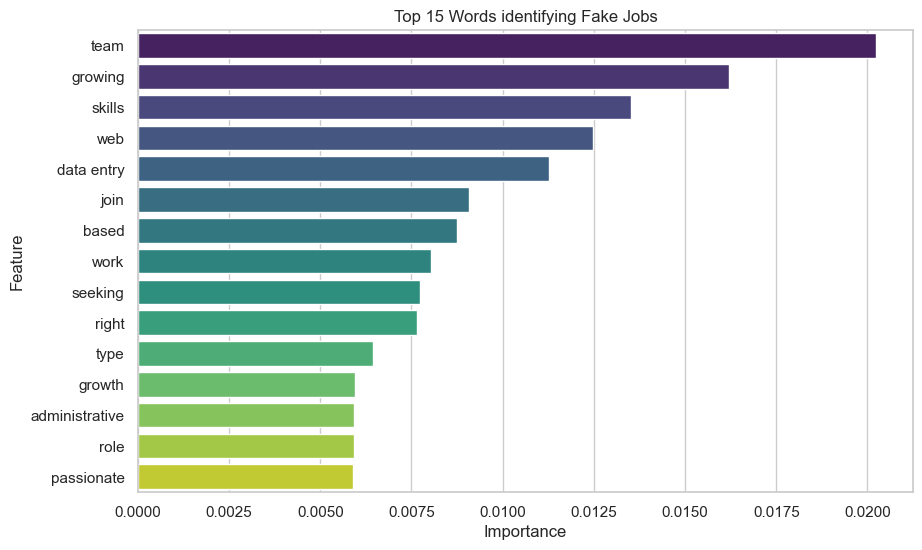

In [38]:
# --- RANDOM FOREST ---

print("Training Random Forest...")

# Hyperparameters set kar rahe hain
rf_params = {
    'n_estimators': [50, 100],      # Trees ki sankhya
    'max_depth': [10, 20, None],    # Tree ki gehraai
    'class_weight': ['balanced']    # Imbalance handle karne ke liye
}

# GridSearch setup
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1', n_jobs=-1)

# Training start time
start_time = time.time()

# Model Training
rf_grid.fit(X_train_tfidf, y_train)

# Training end time
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")
print(f"Best Parameters: {rf_grid.best_params_}")

# Save Best Model
best_rf_model = rf_grid.best_estimator_
joblib.dump(best_rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

# Evaluate using our function
rf_metrics = evaluate_model_performance(best_rf_model, X_test_tfidf, y_test, "Random Forest")

# --- FEATURE IMPORTANCE ---
print("\nExtracting Feature Importance...")

# Feature names nikalna TF-IDF se
feature_names = tfidf.get_feature_names_out()
importances = best_rf_model.feature_importances_

# Dataframe banana visualization ke liye
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(15) # Top 15 words

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Top 15 Words identifying Fake Jobs')
plt.show()

In [39]:
# Results Summary
results_df = pd.DataFrame([lr_metrics, rf_metrics], 
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])

print("\nFINAL MODEL COMPARISON:")
display(results_df)


FINAL MODEL COMPARISON:


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.978188,0.952381,0.578035,0.719424,0.965598
1,Random Forest,0.975112,0.833333,0.606936,0.702341,0.936204


### Deep Learning Setup & Data Preparation

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  # Standard alias
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Check version to confirm installation
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.20.0


In [49]:
MAX_WORDS = 10000       # Vocabulary size (Top 10,000 words)
MAX_LEN = 300           # Max length of each job description (truncating/padding)
EMBEDDING_DIM = 100     # Size of the embedding vector

print("Tokenizing text data...")
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
# Raw text column select karein (Milestone 1 se)
texts = df['description_clean'].astype(str).values 
labels = df['fraudulent'].values

tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f"Found {len(word_index)} unique tokens.")

# Padding sequences to ensure uniform input length
X_seq = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
y_seq = np.array(labels)

# Split into Train and Test (Standard 80-20 split)
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)

print(f"Training Data Shape: {X_train_seq.shape}")
print(f"Testing Data Shape: {X_test_seq.shape}")

Tokenizing text data...
Found 57765 unique tokens.
Training Data Shape: (14304, 300)
Testing Data Shape: (3576, 300)


### BiLSTM Model Architecture

In [50]:
# 2. BUILD BiLSTM MODEL

model = Sequential([
    # Input & Embedding Layer
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    
    # Bidirectional LSTM Layer (Hidden Layer)
    # return_sequences=False kyunki humein sirf last output chahiye classification ke liye
    Bidirectional(LSTM(64, return_sequences=False)),
    
    # Dropout for regularization
    Dropout(0.5),
    
    # Dense Hidden Layer
    Dense(32, activation='relu'),
    
    # Output Layer (Sigmoid for Binary Classification)
    Dense(1, activation='sigmoid')
])

# Compile Model
# Optimizer: Adam (standard for deep learning)
# Loss: Binary Crossentropy (for 0/1 labels)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

D:\NOTES\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Training with Early Stopping

In [51]:
# 3. TRAIN MODEL

# Early Stopping: Stop training if validation loss doesn't improve for 3 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("Starting Training...")
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=10,                # Maximum epochs
    batch_size=32,            # Batch size
    validation_split=0.1,     # 10% of training data for validation
    callbacks=[early_stop],   # Early stopping callback
    verbose=1
)

Starting Training...
Epoch 1/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 166s 383ms/step - accuracy: 0.9602 - loss: 0.1471 - val_accuracy: 0.9762 - val_loss: 0.0784
Epoch 2/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 154s 382ms/step - accuracy: 0.9805 - loss: 0.0629 - val_accuracy: 0.9790 - val_loss: 0.0903
Epoch 3/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 124s 308ms/step - accuracy: 0.9893 - loss: 0.0329 - val_accuracy: 0.9790 - val_loss: 0.0789
Epoch 4/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 230s 572ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9783 - val_loss: 0.1024


### Evaluation & Visualization

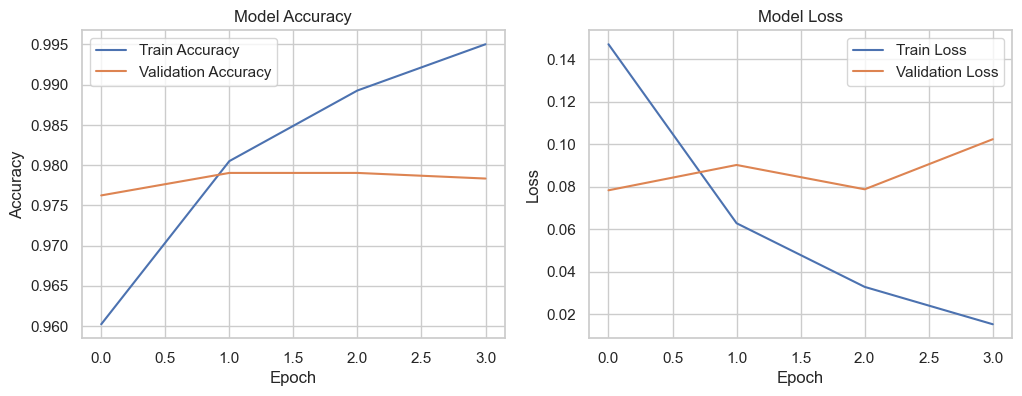


Evaluating on Test Set...
Test Accuracy: 97.37%
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step

Classification Report (Deep Learning):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3403
           1       0.82      0.58      0.68       173

    accuracy                           0.97      3576
   macro avg       0.90      0.79      0.83      3576
weighted avg       0.97      0.97      0.97      3576



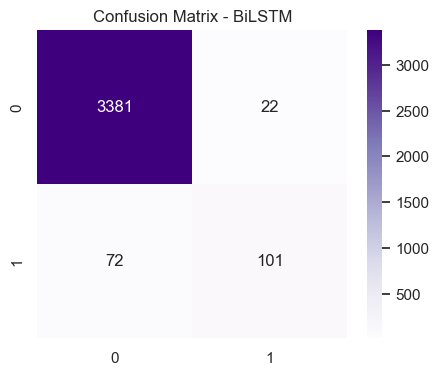

In [52]:
# 4. EVALUATION & PLOTS

# Plot Training History
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# Final Evaluation on Test Set
print("\nEvaluating on Test Set...")
loss, accuracy = model.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Classification Report
y_pred_prob = model.predict(X_test_seq)
y_pred_dl = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report (Deep Learning):")
print(classification_report(y_test_seq, y_pred_dl))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_seq, y_pred_dl), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - BiLSTM")
plt.show()

In [53]:
# 1. Vectorizer save
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [54]:
joblib.dump(best_rf_model, 'fake_job_model.pkl')

print("Files saved successfully: 'tfidf_vectorizer.pkl' and 'fake_job_model.pkl'")

Files saved successfully: 'tfidf_vectorizer.pkl' and 'fake_job_model.pkl'
